In [1]:
import random

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical



## Load dataset

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

img_count = x_train.shape[0]
img_x_dim = x_train.shape[1]
img_y_dim = x_train.shape[2]

## Confirm handwritten image vs truth

In [ ]:
i = random.randrange(img_count)
print(f"The handwritten sample #{i} is a '{y_train[i]}'")
plt.imshow(x_train[i], cmap='gray_r', vmin = 0, vmax = 255);

## Pre-processing

#### Reshape input data
Input data is N X*Y sized images in the form of [N, X, Y]. So reshape into rows.

In [4]:
xx_train = np.reshape(x_train, (x_train.shape[0], img_x_dim*img_y_dim))
xx_test = np.reshape(x_test, (x_test.shape[0], img_x_dim*img_y_dim))


In [5]:
# print random row in original and reshaped data to confirm expected reshape
j = random.randrange(28)
print(f"Row: {j}")
print(f" - Original = {x_train[i][j]}")
print(f" - Reshaped = {xx_train[i][j*img_y_dim:(j+1)*img_y_dim]}")

row = 23
original = [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 141  86 198   0
   0   0   0   0   0   0   0   0   0   0]
reshaped = [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 141  86 198   0
   0   0   0   0   0   0   0   0   0   0]


#### Encode truth data
Truth data needs to be one-hot encoded

In [11]:
import numpy as np

num_classes = 10
yy_train = to_categorical(y_train, num_classes)
yy_test = to_categorical(y_test, num_classes)


print(y_train[i:i+5])
print('  -------------------')
print(f"#{[0,1,2,3,4,5,6,7,8,9]}")
print(yy_train[0:9])

[9 8 1 4 2]
  -------------------
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Define model

In [7]:
def mnist_model(x, y, epochs, batch_size, model_layout):
    
    # create train & val sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, shuffle=True)
    
    # define model
    model = Sequential()
    
    # first hidden layer
    model.add(Dense(model_layout[0], input_dim=img_x_dim*img_y_dim, activation='relu'))

    # remaining hidden layers
    depth = len(model_layout)
    for width in model_layout[1:]:
        model.add(Dense(width, activation='relu'))

    # output layer
    model.add(Dense(10, activation='softmax'))

    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    # train (fit) the model to the dataset
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

    # plot loss during training
    plt.title('Loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    return model


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 784)               615440    
                                                                 
 dense_34 (Dense)            (None, 196)               153860    
                                                                 
 dense_35 (Dense)            (None, 49)                9653      
                                                                 
 dense_36 (Dense)            (None, 10)                500       
                                                                 
Total params: 779,453
Trainable params: 779,453
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
 12/422 [..............................] - ETA: 3s - loss: 20.7666 - accuracy: 0.3926 

2022-06-26 19:55:21.999260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


420/422 [============================>.] - ETA: 0s - loss: 1.4645 - accuracy: 0.7219

2022-06-26 19:55:26.111483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 5s 10ms/step - loss: 1.4599 - accuracy: 0.7224 - val_loss: 0.5544 - val_accuracy: 0.8485
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.3852 - accuracy: 0.9038 - val_loss: 0.3050 - val_accuracy: 0.9225
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.2223 - accuracy: 0.9418 - val_loss: 0.2340 - val_accuracy: 0.9393
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1578 - accuracy: 0.9572 - val_loss: 0.1961 - val_accuracy: 0.9563
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1202 - accuracy: 0.9678 - val_loss: 0.2406 - val_accuracy: 0.9513
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0985 - accuracy: 0.9728 - val_loss: 0.1366 - val_accuracy: 0.9655
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0787 - accuracy: 0.9785 - val_loss: 0.1785 - val_accuracy: 0.9605
Epoch 8/15

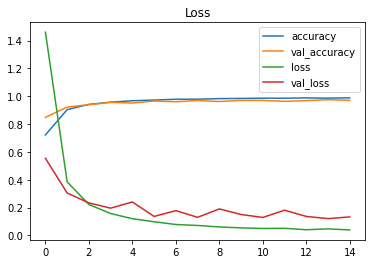

In [96]:
my_model = mnist_model(xx_train, yy_train, 15, 128, [784, 784/4, 784/16])

## Evaluate model

In [98]:
# make probability predictions with the model
predictions = my_model.predict(xx_test)
pred_labels = np.argmax(predictions, axis=1)

# evaluate the keras model
_, train_mse = my_model.evaluate(xx_train, yy_train, verbose=0)
_, test_mse = my_model.evaluate(xx_test, yy_test, verbose=0)

print('Train MSE:  %.4f' % train_mse)
print('Test MSE:  %.4f' % test_mse)

# save off the wrong predictions
wrong_predictions = x_test[pred_labels != y_test]
wrong_labels = pred_labels[pred_labels != y_test]
right_labels = y_test[pred_labels != y_test]

# Characterize amount of wrongness
percent_wrong = wrong_predictions.shape[0]/x_test.shape[0]*100
print(f"Number Wrongly Predicted:  {wrong_predictions.shape[0]}")
print(f"Percent Wrong Predictions: {percent_wrong:.2f}%")

 78/313 [======>.......................] - ETA: 0s

2022-06-26 19:56:27.999547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Train MSE:  0.9891
Test MSE:  0.9749
Number Wrongly Predicted:  251
Percent Wrong Predictions: 2.51%


#### Review wrong predictions

Handwritten sample #43:
 - Predicted: '3'
 - Actual:     '2'


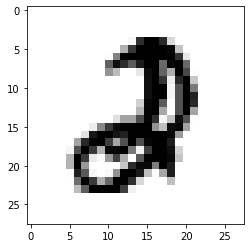

In [99]:
random_wrong = random.randrange(wrong_predictions.shape[0])
print(f"Handwritten sample #{random_wrong}:")
print(f" - Predicted: '{wrong_labels[random_wrong]}'")
print(f" - Actual:     '{right_labels[random_wrong]}'")
plt.imshow(wrong_predictions[random_wrong], cmap='gray_r', vmin = 0, vmax = 255);

## Visualize Model Layers

In [100]:
print(my_model.layers)
# cw1 = np.array(my_model.layers[1].get_weights())
# print(cw1.shape) # 2 weight, 1 weight, 1 bias
# print(cw1[0].shape) # 3 channels, 3 by 3 kernels, 32 filters
# print(cw1[1].shape) # 32 biases

# cw1 = np.array(my_model.layers[2].get_weights())
# print(cw1.shape) # this is just a flatten operations, so no weights

# cw1 = np.array(my_model.layers[3].get_weights())
# print(cw1.shape) # 2 -> 1 weight, 1 bias
# print(cw1[0].shape) # 28800 inputs, 5 outputs, 28800 by 5 weight matrix
# print(cw1[1].shape) # 5 biases

[<keras.layers.core.dense.Dense object at 0x2d289d6a0>, <keras.layers.core.dense.Dense object at 0x2986cf040>, <keras.layers.core.dense.Dense object at 0x2d28b5cd0>, <keras.layers.core.dense.Dense object at 0x2ccac8df0>]


In [127]:
from keras import backend as K

for w in my_model.trainable_weights:
#     print(w)
    print(K.eval(w).shape)

(784, 784)
(784,)
(784, 196)
(196,)
(196, 49)
(49,)
(49, 10)
(10,)


In [102]:
plt.imshow(K.eval(w)[0][0], cmap='gray_r', vmin = 0, vmax = 255);

IndexError: invalid index to scalar variable.

In [123]:
print(my_model.get_config)

<bound method Sequential.get_config of <keras.engine.sequential.Sequential object at 0x2c835aa60>>


(784,)


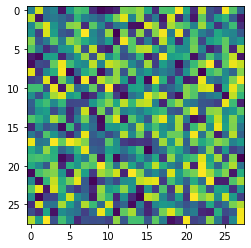

In [134]:
# first layer
a = K.eval(my_model.trainable_weights[0][2])
print(a.shape)
aa = np.reshape(a, (28, 28))
plt.imshow(aa);

(196,)


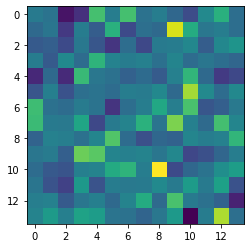

In [131]:
# second layer
b = K.eval(my_model.trainable_weights[3])
print(b.shape)
bb = np.reshape(b, (14, 14))
plt.imshow(bb);

(49,)


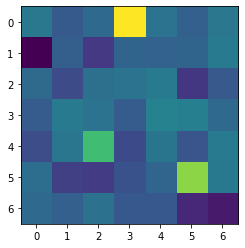

In [132]:
# third layer
c = K.eval(my_model.trainable_weights[5])
print(c.shape)
cc = np.reshape(c, (7, 7))
plt.imshow(cc);